In [60]:

import numpy as np   

from sklearn.model_selection import train_test_split


from sklearn.cluster import KMeans

import pandas as pd    

from sklearn.preprocessing import StandardScaler


import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### 1. Import and warehouse data: [ Score: 3 points ]
### • Import all the given datasets and explore shape and size.
### • Merge all datasets onto one and explore final shape and size.
### • Export the final dataset and store it on local machine in .csv, .xlsx and .json format for future use.
### • Import the data from above steps into python.

In [2]:
df1=pd.read_json("C:/Users/HP/Downloads/Car-Attributes (1).json")
df2=pd.read_csv("C:/Users/HP/Downloads/Car+name (1).csv")

In [3]:
df1.head(5)

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [4]:
df2.head(5)

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


In [5]:
df=df1.join(df2)

In [6]:
df.head(5)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [7]:
df.shape

(398, 9)

In [8]:
df.to_csv('D:\ML\AutoCars.csv',index=False)
df.to_json('D:\ML\AutoCars.json')
df.to_excel('D:\ML\AutoCars.xlsx',index=False)

In [9]:
temp1=pd.read_csv('D:\ML\AutoCars.csv')
temp1.head(5)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [10]:
temp2=pd.read_json('D:\ML\AutoCars.json')
temp2.head(5)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [11]:
temp3=pd.read_excel('D:\ML\AutoCars.xlsx')
temp3.head(5)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### 2. Data cleansing: [ Score: 3 points ]
### • Missing/incorrect value treatment
### • Drop attribute/s if required using relevant functional knowledge
### • Perform another kind of corrections/treatment on the data.

In [12]:
df = df.drop('car_name', axis=1)

In [13]:
df

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [15]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [16]:
df.dtypes

mpg       float64
cyl         int64
disp      float64
hp         object
wt          int64
acc       float64
yr          int64
origin      int64
dtype: object

In [17]:
temp = pd.DataFrame(df.hp.str.isdigit()) 
temp[temp['hp'] == False]

,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [18]:
df = df.replace('?', np.nan)

In [19]:
df[df.isnull().any(axis=1)]

,mpg,cyl,disp,hp,wt,acc,yr,origin
32,25.0,4,98.0,NaN,2046,19.0,71,1
126,21.0,6,200.0,NaN,2875,17.0,74,1
330,40.9,4,85.0,NaN,1835,17.3,80,2
336,23.6,4,140.0,NaN,2905,14.3,80,1
354,34.5,4,100.0,NaN,2320,15.8,81,2
374,23.0,4,151.0,NaN,3035,20.5,82,1


In [20]:
df.median()

mpg         23.0
cyl          4.0
disp       148.5
hp          93.5
wt        2803.5
acc         15.5
yr          76.0
origin       1.0
dtype: float64

In [21]:
df = df.apply(lambda x: x.fillna(x.median()),axis=0)

In [22]:
df

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1
394,44.0,4,97.0,52.0,2130,24.6,82,2
395,32.0,4,135.0,84.0,2295,11.6,82,1
396,28.0,4,120.0,79.0,2625,18.6,82,1


In [23]:
df.dtypes

mpg       float64
cyl         int64
disp      float64
hp        float64
wt          int64
acc       float64
yr          int64
origin      int64
dtype: object

In [24]:
df['hp'] = df['hp'].astype('float64')

In [25]:
df.describe()

,mpg,cyl,disp,hp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


### 3. Data analysis & visualisation: [ Score: 4 points ]
### • Perform detailed statistical analysis on the data.
### • Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after  each
### analysis. 

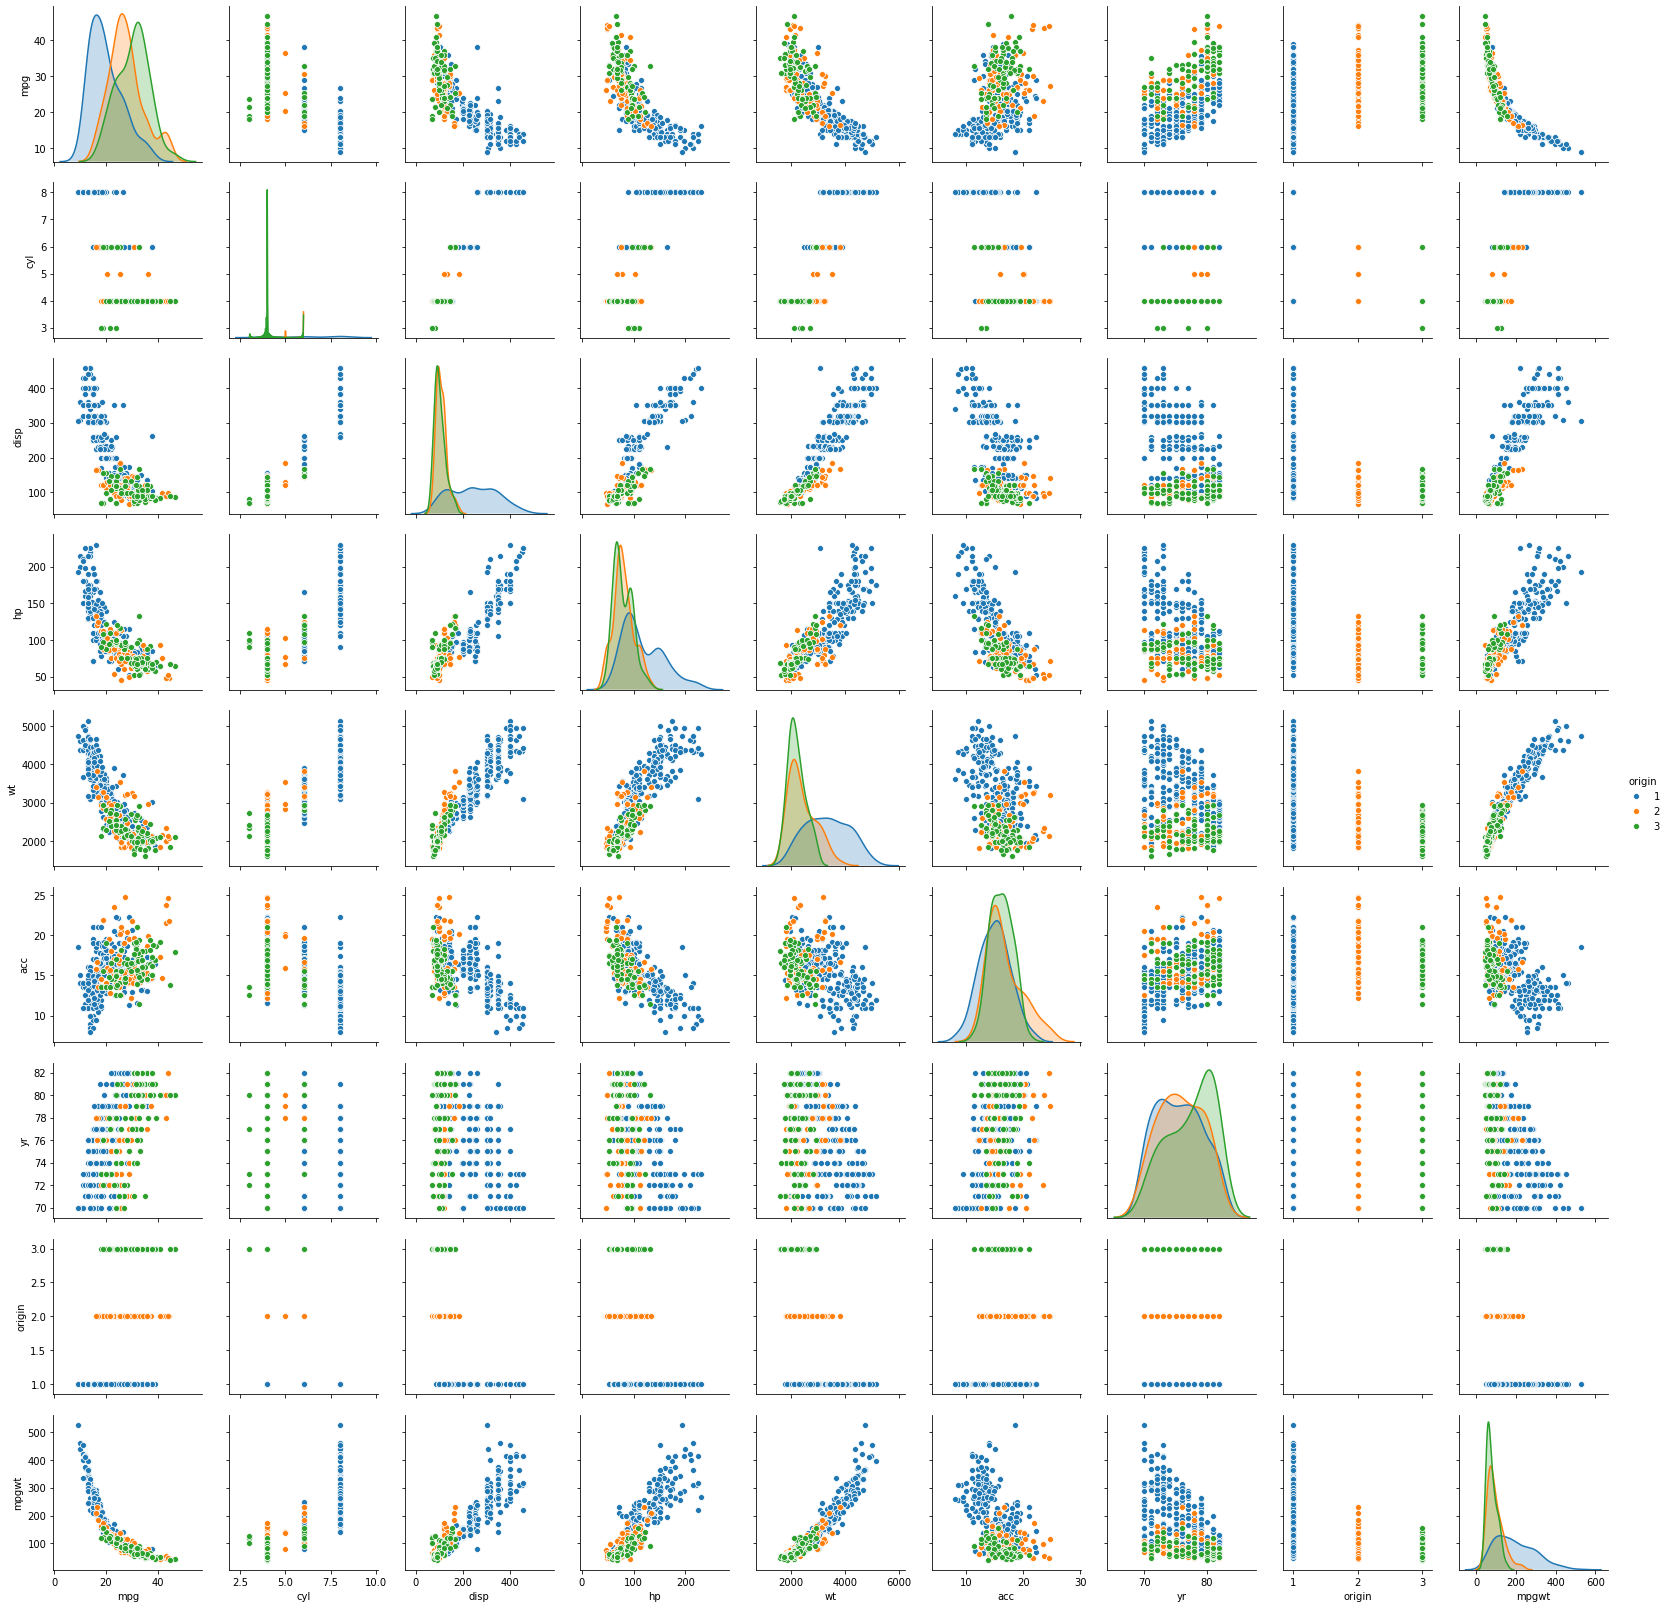

In [26]:
df['mpgwt'] = df['wt'] / df['mpg']
df_attr = df.iloc[:, 0:9]
sns.pairplot(df_attr, diag_kind='kde', hue = 'origin')  

In [27]:
from scipy.stats import zscore

df_attr = df.loc[:, ['mpg','cyl','disp','hp','wt','acc','mpgwt']]
df_attr_z = df_attr.apply(zscore)
array = df_attr_z.values

df_attr_z

,mpg,cyl,disp,hp,wt,acc,mpgwt
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,0.423424
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,0.960120
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,0.384080
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,0.630630
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,0.508986
...,...,...,...,...,...,...,...
393,0.446497,-0.856321,-0.513026,-0.479482,-0.213324,0.011586,-0.527773
394,2.624265,-0.856321,-0.925936,-1.370127,-0.993671,3.279296,-1.099784
395,1.087017,-0.856321,-0.561039,-0.531873,-0.798585,-1.440730,-0.857025
396,0.574601,-0.856321,-0.705077,-0.662850,-0.408411,1.100822,-0.627579


### 4. Machine learning: [ Score: 8 points ]
### • Use K Means and Hierarchical clustering to find out the optimal number of clusters in the data.
### • Share your insights about the difference in using these two methods. 

In [28]:
cluster_range = range( 2, 6)   
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(df_attr)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,7.551842e+07
1,3,3.498328e+07
2,4,1.959973e+07
3,5,1.416158e+07


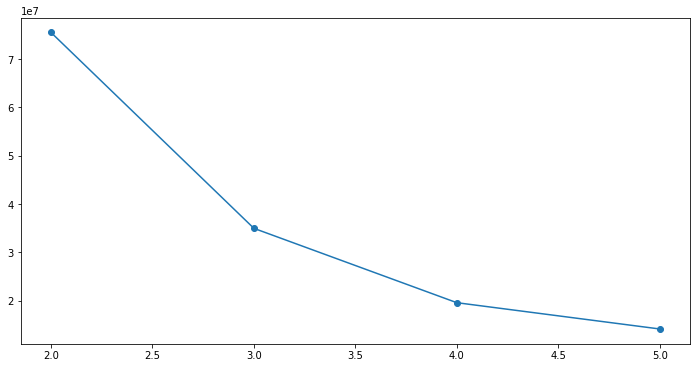

In [29]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [70]:
cluster = KMeans( n_clusters = 3, random_state = 2354 )
cluster.fit(df_attr_z)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2354, tol=0.0001, verbose=0)

In [31]:
centroids = cluster.cluster_centers_
centroids

array([[-1.15533638,  1.49819126,  1.49621235,  1.50536872,  1.39614231,
        -1.06554838,  1.47292162],
       [ 0.75394661, -0.85347696, -0.80321374, -0.67506194, -0.78549879,
         0.36133415, -0.74655644],
       [-0.47531216,  0.34571968,  0.23819852, -0.05029027,  0.30072197,
         0.28943659,  0.13828114]])

In [32]:
centroid_df = pd.DataFrame(centroids, columns = list(df_attr_z) )
centroid_df

,mpg,cyl,disp,hp,wt,acc,mpgwt
0,-1.155336,1.498191,1.496212,1.505369,1.396142,-1.065548,1.472922
1,0.753947,-0.853477,-0.803214,-0.675062,-0.785499,0.361334,-0.746556
2,-0.475312,0.345720,0.238199,-0.050290,0.300722,0.289437,0.138281


In [33]:
prediction=cluster.predict(df_attr_z)
df_attr_z["GROUP"] = prediction 

In [34]:
df_attr_z

,mpg,cyl,disp,hp,wt,acc,mpgwt,GROUP
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,0.423424,0
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,0.960120,0
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,0.384080,0
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,0.630630,0
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,0.508986,0
...,...,...,...,...,...,...,...,...
393,0.446497,-0.856321,-0.513026,-0.479482,-0.213324,0.011586,-0.527773,1
394,2.624265,-0.856321,-0.925936,-1.370127,-0.993671,3.279296,-1.099784,1
395,1.087017,-0.856321,-0.561039,-0.531873,-0.798585,-1.440730,-0.857025,1
396,0.574601,-0.856321,-0.705077,-0.662850,-0.408411,1.100822,-0.627579,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023E789116C8>,
      dtype=object)

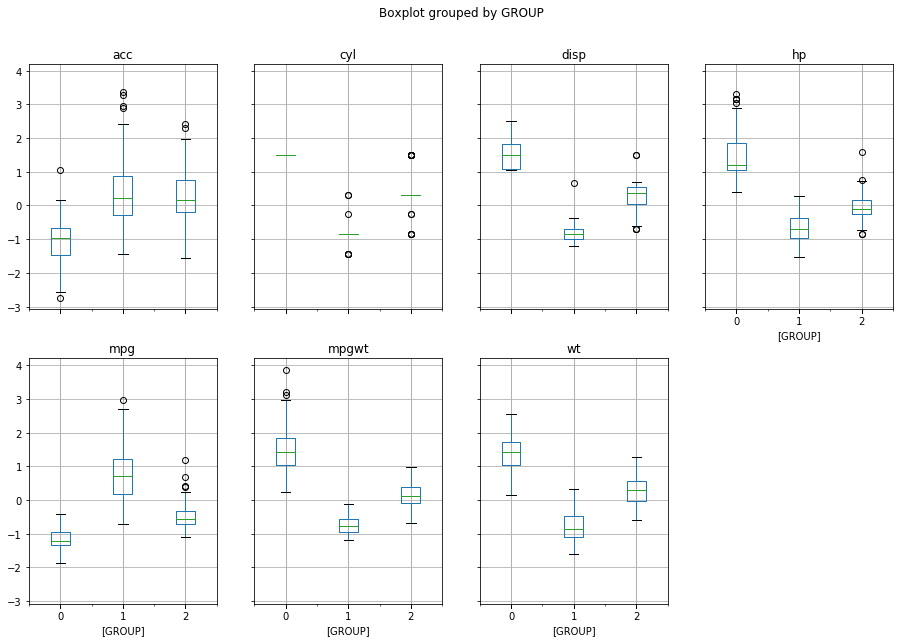

In [35]:
df_attr_z.boxplot(by = 'GROUP',  layout=(2,4), figsize=(15, 10))

In [36]:
from sklearn.cluster import AgglomerativeClustering 
Agg = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
Agg.fit(array)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [37]:
df_attr['labels'] = Agg.labels_

df_attr.groupby(["labels"]).count()

,mpg,cyl,disp,hp,wt,acc,mpgwt
labels,,,,,,,
0,294,294,294,294,294,294,294
1,100,100,100,100,100,100,100
2,4,4,4,4,4,4,4


In [38]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
pdistance = pdist(df_attr_z)

Z = linkage(df_attr_z, 'average')
c, coph_dists = cophenet(Z , pdistance)

c

0.8618637607979358

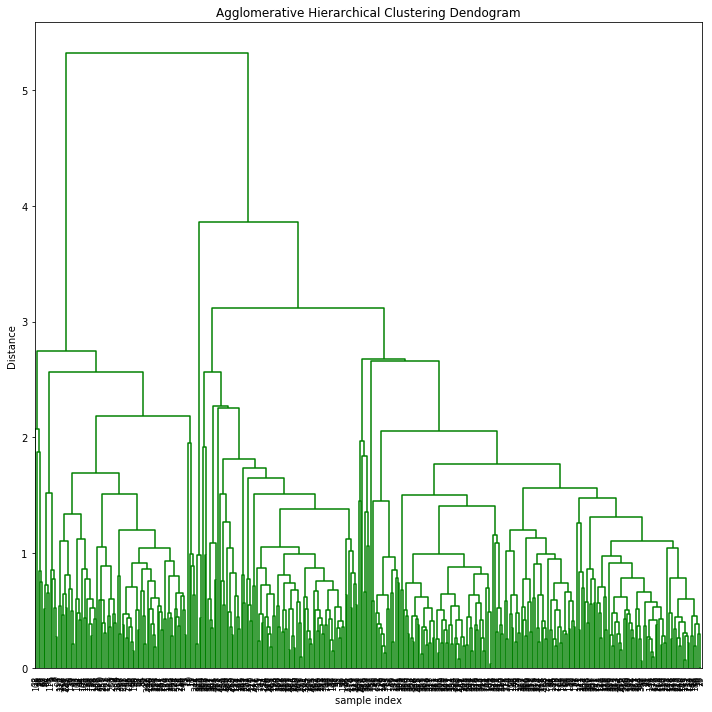

In [39]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 800, leaf_font_size=8. )
plt.tight_layout()

In [41]:
df_attr

,mpg,cyl,disp,hp,wt,acc,mpgwt,labels
0,18.0,8,307.0,130.0,3504,12.0,194.666667,1
1,15.0,8,350.0,165.0,3693,11.5,246.200000,1
2,18.0,8,318.0,150.0,3436,11.0,190.888889,1
3,16.0,8,304.0,150.0,3433,12.0,214.562500,1
4,17.0,8,302.0,140.0,3449,10.5,202.882353,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,103.333333,0
394,44.0,4,97.0,52.0,2130,24.6,48.409091,2
395,32.0,4,135.0,84.0,2295,11.6,71.718750,0
396,28.0,4,120.0,79.0,2625,18.6,93.750000,0


In [43]:
# Addressing outliers at group level

data = df_attr_z   
       
def replace(group):
    median, std = group.median(), group.std()  
    outliers = (group - median).abs() > 2*std 
    group[outliers] = group.median()     
    return group

data_corrected = (data.groupby('GROUP').transform(replace)) 
concat_data = data_corrected.join(pd.DataFrame(df_attr_z['GROUP']))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023E792A7CC8>,
      dtype=object)

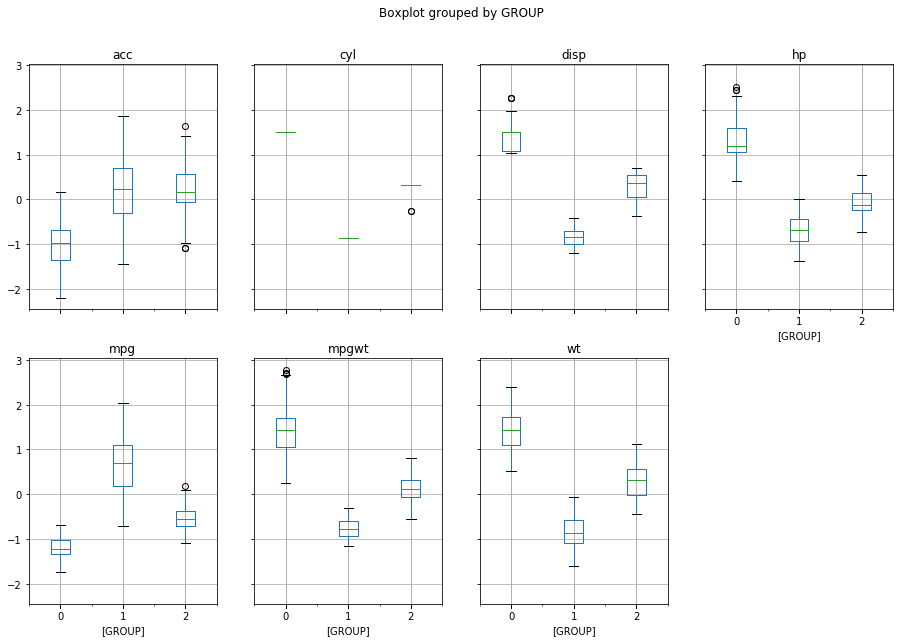

In [44]:
concat_data.boxplot(by = 'GROUP', layout=(2,4), figsize=(15, 10))

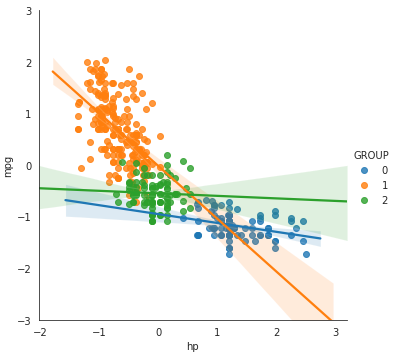

In [45]:
# mpg Vs hp

var = 'hp'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'mpg',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

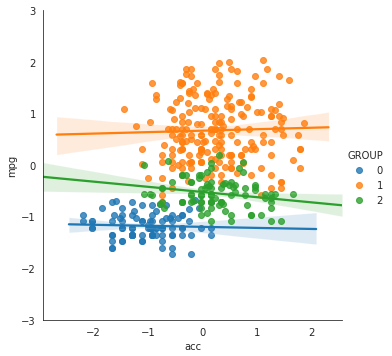

In [46]:
var = 'acc'
with sns.axes_style("white"):
    plot = sns.lmplot(var,'mpg',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

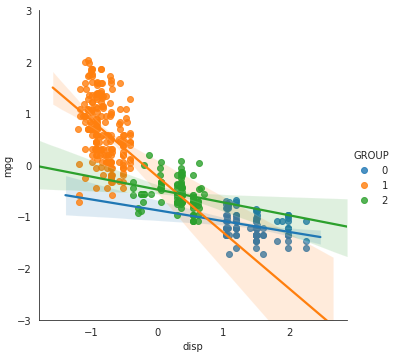

In [47]:
var = 'disp'
with sns.axes_style("white"):
    plot = sns.lmplot(var,'mpg',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

### 5. Answer below questions based on outcomes of using ML based methods. [ Score: 5 points ]
### • Mention how many optimal clusters are present in the data and what could be the possible reason behind it.
### • Use linear regression model on different clusters separately and print the coefficients of the models individually
### • How using different models for different clusters will be helpful in this case and how it will be different than using
### one single model without clustering? Mention how it impacts performance and prediction.

In [48]:
X = df_attr_z[['cyl','disp','hp','wt','acc','mpgwt','GROUP']]
y = df_attr_z['mpg']   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [64]:
# Import Linear Regression machine learning library
from sklearn.tree import DecisionTreeRegressor 

DT = DecisionTreeRegressor(random_state=0 , max_depth=3)

DT.fit(X_train , y_train)


DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [65]:
print(DT.score(X_train, y_train))
print(DT.score(X_test, y_test))


0.9322548526499339
0.9023593192651316


In [66]:
from sklearn.ensemble import GradientBoostingRegressor
sc=StandardScaler()
scaledX_train = sc.fit_transform(X_train)
scaledX_test = sc.transform(X_test)
gbcl = GradientBoostingRegressor(n_estimators = 200, learning_rate = 0.05)
gbcl = gbcl.fit(scaledX_train, y_train)
print("Training Score")
print(gbcl.score(scaledX_train , y_train))
print("Testing Score")
print(gbcl.score(scaledX_test , y_test))

Training Score
0.9979473060874015
Testing Score
0.9856858434402689
